In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set max_rows and max_columns to 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Load Career Earnings Data

In [3]:
earnings_data = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL_Top_400_Career_Earnings_Active_Players.xlsx'

In [63]:
earnings_df = pd.read_excel(earnings_data)
earnings_df.head()

,Unnamed: 0,Full Name,First Name,Last Name,Name Suffix,Position,Career Earnings
0,1,Eli Manning,Eli,Manning,NaN,Quarterback,"$235,280,004"
1,2,Drew Brees,Drew,Brees,NaN,Quarterback,"$221,710,422"
2,3,Tom Brady,Tom,Brady,NaN,Quarterback,"$212,166,804"
3,4,Aaron Rodgers,Aaron,Rodgers,NaN,Quarterback,"$204,044,529"
4,5,Philip Rivers,Philip,Rivers,NaN,Quarterback,"$202,917,656"


In [64]:
earnings_df = earnings_df.drop('Unnamed: 0', axis=1)
earnings_df.head()

,Full Name,First Name,Last Name,Name Suffix,Position,Career Earnings
0,Eli Manning,Eli,Manning,NaN,Quarterback,"$235,280,004"
1,Drew Brees,Drew,Brees,NaN,Quarterback,"$221,710,422"
2,Tom Brady,Tom,Brady,NaN,Quarterback,"$212,166,804"
3,Aaron Rodgers,Aaron,Rodgers,NaN,Quarterback,"$204,044,529"
4,Philip Rivers,Philip,Rivers,NaN,Quarterback,"$202,917,656"


In [65]:
# striping out the dollar sign and commas in career earnings so I can convert str data type to int
earnings_df['Career Earnings'] = earnings_df['Career Earnings'].str.strip('$').str.replace(',', '').astype('int')
earnings_df.head()

,Full Name,First Name,Last Name,Name Suffix,Position,Career Earnings
0,Eli Manning,Eli,Manning,NaN,Quarterback,235280004
1,Drew Brees,Drew,Brees,NaN,Quarterback,221710422
2,Tom Brady,Tom,Brady,NaN,Quarterback,212166804
3,Aaron Rodgers,Aaron,Rodgers,NaN,Quarterback,204044529
4,Philip Rivers,Philip,Rivers,NaN,Quarterback,202917656


In [66]:
# Inspect earnings_df info
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
Full Name          400 non-null object
First Name         400 non-null object
Last Name          400 non-null object
Name Suffix        4 non-null object
Position           400 non-null object
Career Earnings    400 non-null int32
dtypes: int32(1), object(5)
memory usage: 17.3+ KB


### Note:

Ran into an issue when merging earnings dataframe and draft dataframe on player name alone. Some players have the same name. To be able to merge on both name and postion, I have to change the position names in the earnings dataframe to match the position names in the draft dataframe. One issue with this is that some of the position names are inconsistent. For instance, there are 757 players with the postion 'DB', but that could be CB (cornerback), FS (free safety), SS (strong safety), or S (safety). I'm going to group similar positions together to try to avoid losing data with the merge.

In [67]:
earnings_df['Position'].value_counts()

Wide Receiver         45
Quarterback           43
Cornerback            42
Defensive End         38
Defensive Tackle      33
Outside Linebacker    29
Guard                 28
Tight End             20
Left Tackle           20
Running Back          16
Right Tackle          15
Free Safety           15
Inside Linebacker     13
Center                13
Kicker                12
Strong Safety          9
Punter                 7
Tackle                 1
Safety                 1
Name: Position, dtype: int64

In [68]:
earnings_df['Position'] = earnings_df['Position'].replace({'Wide Receiver': 'WR', 'Quarterback': 'QB', 'Cornerback': 'DB',
                                                       'Defensive End': 'DE', 'Defensive Tackle': 'DT', 'Guard': 'G',
                                                       'Outside Linebacker': 'LB', 'Tight End': 'TE', 'Left Tackle': 'T',
                                                       'Running Back': 'RB', 'Right Tackle': 'T', 'Free Safety': 'DB',
                                                       'Inside Linebacker': 'LB', 'Center': 'C', 'Kicker': 'K',
                                                       'Strong Safety': 'DB', 'Punter': 'P', 'Tackle': 'T', 'Safety': 'DB'})
earnings_df['Position'].value_counts()

DB    67
WR    45
QB    43
LB    42
DE    38
T     36
DT    33
G     28
TE    20
RB    16
C     13
K     12
P      7
Name: Position, dtype: int64

### Load NFL Draft Data for 1999-2018

In [76]:
draft_2018_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2018.xlsx'
draft_2017_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2017.xlsx'
draft_2016_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2016.xlsx'
draft_2015_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2015.xlsx'
draft_2014_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2014.xlsx'
draft_2013_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2013.xlsx'
draft_2012_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2012.xlsx'
draft_2011_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2011.xlsx'
draft_2010_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2010.xlsx'
draft_2009_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2009.xlsx'
draft_2008_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2008.xlsx'
draft_2007_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2007.xlsx'
draft_2006_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2006.xlsx'
draft_2005_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2005.xlsx'
draft_2004_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2004.xlsx'
draft_2003_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2003.xlsx'
draft_2002_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2002.xlsx'
draft_2001_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2001.xlsx'
draft_2000_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_2000.xlsx'
draft_1999_file = 'C:/Users/theta/Desktop/Lambda School/Unit 1/Project Data/NFL Draft Data/NFL_Draft_1999.xlsx'

In [77]:
draft_2018 = pd.read_excel(draft_2018_file)
draft_2017 = pd.read_excel(draft_2017_file)
draft_2016 = pd.read_excel(draft_2016_file)
draft_2015 = pd.read_excel(draft_2015_file)
draft_2014 = pd.read_excel(draft_2014_file)
draft_2013 = pd.read_excel(draft_2013_file)
draft_2012 = pd.read_excel(draft_2012_file)
draft_2011 = pd.read_excel(draft_2011_file)
draft_2010 = pd.read_excel(draft_2010_file)
draft_2009 = pd.read_excel(draft_2009_file)
draft_2008 = pd.read_excel(draft_2008_file)
draft_2007 = pd.read_excel(draft_2007_file)
draft_2006 = pd.read_excel(draft_2006_file)
draft_2005 = pd.read_excel(draft_2005_file)
draft_2004 = pd.read_excel(draft_2004_file)
draft_2003 = pd.read_excel(draft_2003_file)
draft_2002 = pd.read_excel(draft_2002_file)
draft_2001 = pd.read_excel(draft_2001_file)
draft_2000 = pd.read_excel(draft_2000_file)
draft_1999 = pd.read_excel(draft_1999_file)

print(draft_2018.shape)
draft_2018.head()

(256, 34)


,Year,Rnd,Pick,Tm,Full Name,First Name,Last Name,Name Suffix,PlayerID,Pos,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 33
0,2018,1,1,CLE,Baker Mayfield,Baker,Mayfield,NaN,MayfBa00,QB,23,2018.0,0,0,1,10.0,10.0,14.0,310.0,486.0,3725.0,27.0,14.0,39.0,131.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,College Stats
1,2018,1,2,NYG,Saquon Barkley,Saquon,Barkley,NaN,BarkSa00,RB,21,2018.0,0,1,1,14.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,261.0,1307.0,11.0,91.0,721.0,4.0,NaN,NaN,NaN,Penn St.,College Stats
2,2018,1,3,NYJ,Sam Darnold,Sam,Darnold,NaN,DarnSa00,QB,21,2018.0,0,0,1,7.0,7.0,13.0,239.0,414.0,2865.0,17.0,15.0,44.0,138.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,College Stats
3,2018,1,4,CLE,Denzel Ward,Denzel,Ward,NaN,WardDe02,CB,21,2018.0,0,1,1,8.0,8.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,3.0,NaN,Ohio St.,College Stats
4,2018,1,5,DEN,Bradley Chubb,Bradley,Chubb,NaN,ChubBr00,DE,22,2018.0,0,0,1,8.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,NaN,12.0,North Carolina St.,College Stats


In [78]:
# Combine draft data into one dataframe
draft_data = pd.concat([draft_2018, draft_2017, draft_2016, draft_2015, draft_2014, draft_2013, draft_2012,
                        draft_2011, draft_2010, draft_2009, draft_2008, draft_2007, draft_2006, draft_2005,
                        draft_2004, draft_2003, draft_2002, draft_2001, draft_2000, draft_1999])
draft_data = draft_data.rename(columns={'Rnd': 'Round', 'Tm': 'Team', 'To': 'Last Season', 'Pos': 'Position', 
                                       'Year': 'Draft Year'})
draft_data.shape

(5090, 34)

In [79]:
draft_data['Position'].value_counts()

DB     811
WR     648
LB     542
DE     451
RB     410
DT     400
T      382
TE     296
G      280
QB     249
C      125
CB     114
S       74
OLB     69
FB      55
K       44
P       41
OL      40
ILB     34
NT      15
DL       6
LS       4
Name: Position, dtype: int64

In [80]:
# As stated above, I'm grouping similar positions so the draft data and earnings data can be merged on name and position
# I'm going to lose players with position names 'OL' and 'DL', I would have to check the position of each player and change
# their position individually. Also, some players play multiple positions on the offensive line and defensive line, so the
# position they were drafted at might not be the position listed in the earnings dataframe.
draft_data['Position'] = draft_data['Position'].replace({'CB': 'DB', 'S': 'DB', 'FB': 'RB', 'OLB': 'LB',
                                                        'ILB': 'LB', 'NT': 'DT', 'LS': 'C'})
draft_data['Position'].value_counts()

DB    999
WR    648
LB    645
RB    465
DE    451
DT    415
T     382
TE    296
G     280
QB    249
C     129
K      44
P      41
OL     40
DL      6
Name: Position, dtype: int64

In [81]:
draft_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5090 entries, 0 to 252
Data columns (total 34 columns):
Draft Year      5090 non-null int64
Round           5090 non-null int64
Pick            5090 non-null int64
Team            5090 non-null object
Full Name       5090 non-null object
First Name      5090 non-null object
Last Name       5090 non-null object
Name Suffix     1 non-null object
PlayerID        4805 non-null object
Position        5090 non-null object
Age             4799 non-null float64
Last Season     4612 non-null float64
AP1             5090 non-null int64
PB              5090 non-null int64
St              5090 non-null int64
CarAV           4612 non-null float64
DrAV            4271 non-null float64
G               4583 non-null float64
Cmp             4612 non-null float64
Att             4612 non-null float64
Yds             4612 non-null float64
TD              4612 non-null float64
Int             4611 non-null float64
Att.1           4612 non-null float64
Yds.

In [82]:
draft_data.isnull().sum()

Draft Year         0
Round              0
Pick               0
Team               0
Full Name          0
First Name         0
Last Name          0
Name Suffix     5089
PlayerID         285
Position           0
Age              291
Last Season      478
AP1                0
PB                 0
St                 0
CarAV            478
DrAV             819
G                507
Cmp              478
Att              478
Yds              478
TD               478
Int              479
Att.1            478
Yds.1            478
TD.1             478
Rec              478
Yds.2            478
TD.2             478
Solo            1600
Int.1           4030
Sk              3677
College/Univ      13
Unnamed: 33     1297
dtype: int64

In [83]:
draft_data[draft_data['Last Season'].isnull()]

,Draft Year,Round,Pick,Team,Full Name,First Name,Last Name,Name Suffix,PlayerID,Position,Age,Last Season,AP1,PB,St,CarAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 33
22,2018,1,23,NWE,Isaiah Wynn,Isaiah,Wynn,NaN,WynnIs00,T,21.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Georgia,College Stats
55,2018,2,56,NWE,Duke Dawson,Duke,Dawson,NaN,DawsDu00,DB,21.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florida,College Stats
58,2018,2,59,WAS,Derrius Guice,Derrius,Guice,NaN,GuicDe00,RB,21.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSU,College Stats
75,2018,3,76,PIT,Mason Rudolph,Mason,Rudolph,NaN,RudoMa00,QB,23.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oklahoma St.,College Stats
126,2018,4,127,NOR,Rick Leonard,Rick,Leonard,NaN,LeonRi00,T,21.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,College Stats
127,2018,4,128,SFO,Kentavius Street,Kentavius,Street,NaN,StreKe00,DT,21.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Carolina St.,College Stats
128,2018,4,129,JAX,Will Richardson,Will,Richardson,NaN,RichWi01,T,22.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Carolina St.,College Stats
131,2018,4,132,BAL,Jaleel Scott,Jaleel,Scott,NaN,ScotJa02,WR,23.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Mexico St.,College Stats
137,2018,5,138,GNB,Cole Madison,Cole,Madison,NaN,MadiCo01,G,23.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington St.,College Stats
155,2018,5,156,DEN,Troy Fumagalli,Troy,Fumagalli,NaN,FumaTr00,TE,23.0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wisconsin,College Stats


## Dealing with NaN values:

The columns with player stats are expected to have a high number of NaN values since different positions have different statistics associated with them. The last season has 478 null values, which is problematic for determining the player's career length. There are a couple reasons why there might be NaN values in the last season column. First, the website that collected the data could have been unable to find this data for all players. Second, the player in question was drafted and then did not make the final roster cut. I think the second reason is the most likely since each player with NaN for last season also has NaN for all statistical categories. Since I'm unsure why there is missing data in this column, I'm going to drop all rows with an NaN value in the last season column.

In [84]:
draft_data = draft_data.dropna(subset=['Last Season'])

In [85]:
print(draft_data.shape)
print(draft_data.isnull().sum())

(4612, 34)
Draft Year         0
Round              0
Pick               0
Team               0
Full Name          0
First Name         0
Last Name          0
Name Suffix     4612
PlayerID           0
Position           0
Age                0
Last Season        0
AP1                0
PB                 0
St                 0
CarAV              0
DrAV             341
G                 29
Cmp                0
Att                0
Yds                0
TD                 0
Int                1
Att.1              0
Yds.1              0
TD.1               0
Rec                0
Yds.2              0
TD.2               0
Solo            1122
Int.1           3552
Sk              3199
College/Univ       9
Unnamed: 33     1104
dtype: int64


In [86]:
# Strip leading and trailing white space from player names so earnings can be merged with draft_data
draft_data['Full Name'] = draft_data['Full Name'].str.strip()
earnings_df['Full Name'] = earnings_df['Full Name'].str.strip()

In [87]:
# Merge earnings_df with draft_data
merged_data = pd.merge(draft_data[['Full Name', 'Draft Year','Last Season', 'Round','Pick', 'Team', 'Position']], 
                       earnings_df[['Full Name', 'Career Earnings', 'Position']], how='inner', on=['Full Name', 'Position'])
print(merged_data.shape)
merged_data.head()

(315, 8)


,Full Name,Draft Year,Last Season,Round,Pick,Team,Position,Career Earnings
0,Baker Mayfield,2018,2018.0,1,1,CLE,QB,22329440
1,Saquon Barkley,2018,2018.0,1,2,NYG,RB,21247092
2,Sam Darnold,2018,2018.0,1,3,NYJ,QB,20558338
3,Denzel Ward,2018,2018.0,1,4,CLE,DB,19771168
4,Bradley Chubb,2018,2018.0,1,5,DEN,DE,18426124


In [91]:
merged_data.sort_values(by='Career Earnings', ascending=False)

,Full Name,Draft Year,Last Season,Round,Pick,Team,Position,Career Earnings
303,Eli Manning,2004,2018.0,1,1,NYG,QB,235280004
312,Drew Brees,2001,2018.0,2,32,SDG,QB,221710422
314,Tom Brady,2000,2018.0,6,199,NWE,QB,212166804
295,Aaron Rodgers,2005,2018.0,1,24,GNB,QB,204044529
305,Philip Rivers,2004,2018.0,1,4,SDG,QB,202917656
306,Ben Roethlisberger,2004,2018.0,1,11,PIT,QB,187286864
255,Matt Ryan,2008,2018.0,1,3,ATL,QB,178707925
233,Matthew Stafford,2009,2018.0,1,1,DET,QB,178278969
304,Larry Fitzgerald,2004,2018.0,1,3,ARI,WR,163296387
257,Joe Flacco,2008,2018.0,1,18,BAL,QB,147800000


### Note:

I lost some data when I merged the draft dataframe and the career earnings dataframe. The career earnings dataframe only contains the career earnings for the top 400 active players. I lost 85 of the expected 400 observations. There are a couple potential reasons for the lost data. First, I only went back 20 years in draft data, and I know I am missing data for a couple kickers who have been in the NFL for more than 20 years. Second, not every player in the NFL is drafted. Some of the top 400 earners could have been signed as undrafted free agents. Third, I lost fewer observations before when I only merged on player name, but some of the merged data was wrong because some players have the same name. So, I have fewer observations, but greater data integrity. I could add team names manually to the earnings dataframe, but that would be too time consuming. I'm just going to accept the lost data and move on.

In [92]:
# Create new column with player's career length in years
# Adding 1 ensures the last season played counts as a full season
merged_data['Career_Len'] = merged_data['Last Season'] - merged_data['Draft Year'] + 1
merged_data.head()

,Full Name,Draft Year,Last Season,Round,Pick,Team,Position,Career Earnings,Career_Len
0,Baker Mayfield,2018,2018.0,1,1,CLE,QB,22329440,1.0
1,Saquon Barkley,2018,2018.0,1,2,NYG,RB,21247092,1.0
2,Sam Darnold,2018,2018.0,1,3,NYJ,QB,20558338,1.0
3,Denzel Ward,2018,2018.0,1,4,CLE,DB,19771168,1.0
4,Bradley Chubb,2018,2018.0,1,5,DEN,DE,18426124,1.0


In [93]:
# Create new column for career earnings divided by one million
# This will make the career earnings easier to chart
merged_data['Career Earnings in Millions'] = round(merged_data['Career Earnings'] / 1000000, 2)
merged_data.head()

,Full Name,Draft Year,Last Season,Round,Pick,Team,Position,Career Earnings,Career_Len,Career Earnings in Millions
0,Baker Mayfield,2018,2018.0,1,1,CLE,QB,22329440,1.0,22.33
1,Saquon Barkley,2018,2018.0,1,2,NYG,RB,21247092,1.0,21.25
2,Sam Darnold,2018,2018.0,1,3,NYJ,QB,20558338,1.0,20.56
3,Denzel Ward,2018,2018.0,1,4,CLE,DB,19771168,1.0,19.77
4,Bradley Chubb,2018,2018.0,1,5,DEN,DE,18426124,1.0,18.43


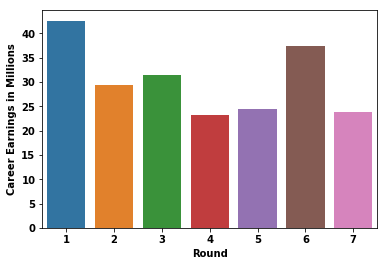

In [96]:
fig, ax = plt.subplots()
ax = sns.barplot(x='Round', y='Career Earnings in Millions', data=merged_data, ci=None, estimator=np.median)

In [97]:
merged_data['Round'].value_counts()

1    147
2     54
3     44
5     23
4     23
6     16
7      8
Name: Round, dtype: int64

In [98]:
earnings_cut_points = [0, 49.99, 99.99, 149.99, 1000]
earnings_labels = ['Less Than 50 M', '50 M - 100 M', '100 M - 150 M', '150 M +']
merged_data['Career Earnings M'] = pd.cut(merged_data['Career Earnings in Millions'], earnings_cut_points,
                                      labels=earnings_labels)
merged_data.head()

,Full Name,Draft Year,Last Season,Round,Pick,Team,Position,Career Earnings,Career_Len,Career Earnings in Millions,Career Earnings M
0,Baker Mayfield,2018,2018.0,1,1,CLE,QB,22329440,1.0,22.33,Less Than 50 M
1,Saquon Barkley,2018,2018.0,1,2,NYG,RB,21247092,1.0,21.25,Less Than 50 M
2,Sam Darnold,2018,2018.0,1,3,NYJ,QB,20558338,1.0,20.56,Less Than 50 M
3,Denzel Ward,2018,2018.0,1,4,CLE,DB,19771168,1.0,19.77,Less Than 50 M
4,Bradley Chubb,2018,2018.0,1,5,DEN,DE,18426124,1.0,18.43,Less Than 50 M


In [99]:
table = pd.crosstab(merged_data['Round'], merged_data['Career Earnings M'])
table

Career Earnings M,Less Than 50 M,50 M - 100 M,100 M - 150 M,150 M +
Round,,,,
1,85,49,6,7
2,44,9,0,1
3,35,9,0,0
4,21,2,0,0
5,19,4,0,0
6,12,3,0,1
7,6,2,0,0


In [100]:
table_pct = pd.crosstab(merged_data['Round'], merged_data['Career Earnings M'], normalize='index')
table_pct

Career Earnings M,Less Than 50 M,50 M - 100 M,100 M - 150 M,150 M +
Round,,,,
1,0.578231,0.333333,0.040816,0.047619
2,0.814815,0.166667,0.000000,0.018519
3,0.795455,0.204545,0.000000,0.000000
4,0.913043,0.086957,0.000000,0.000000
5,0.826087,0.173913,0.000000,0.000000
6,0.750000,0.187500,0.000000,0.062500
7,0.750000,0.250000,0.000000,0.000000


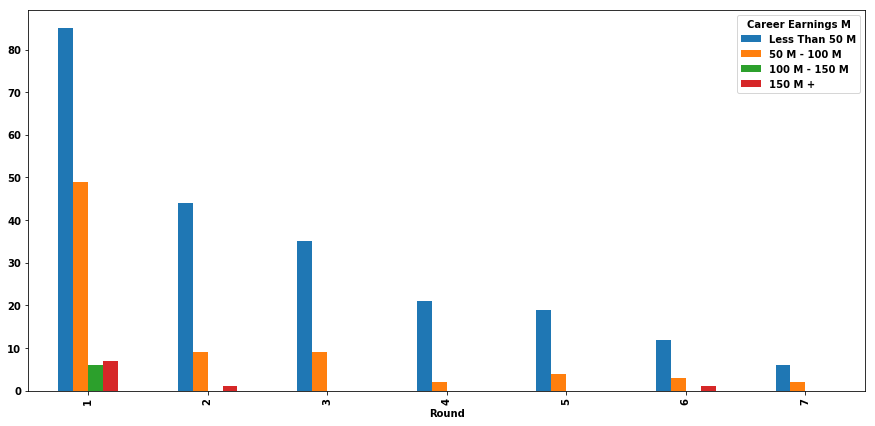

In [101]:
table.plot(kind='bar', figsize=(15, 7));